In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
def callEuOpt(rate, maturity, strike, future, volatility):
    """The Black 76 model for a European call-option price.
        r = interest rate (continuously compounded per anuum)
        maturity = date of maturity
        future = future price
        strike = strike price
        volatility = volatility"""
    d1 = (np.log(future/strike)+maturity*(volatility**2/2))/(volatility*maturity**(0.5))
    d2 = d1 - volatility*maturity**(0.5)
    Nd1 = st.norm.cdf(d1)
    Nd2 = st.norm.cdf(d2)
    return np.exp(-rate*maturity)*(future*Nd1-strike*Nd2)
def putEuOpt(rate, maturity, strike, future, volatility):
    """The Black 76 model for a European put-option price.
        r = interest rate (continuously compounded per anuum)
        maturity = date of maturity
        future = future price
        strike = strike price
        volatility = volatility"""
    d1 = (np.log(future/strike)+maturity*(volatility**2/2))/(volatility*maturity**(0.5))
    d2 = d1 - volatility*maturity**(0.5)
    Nd1 = st.norm.cdf(-1*d1)
    Nd2 = st.norm.cdf(-1*d2)
    return np.exp(-rate*maturity)*(strike*Nd2-future*Nd1)

In [3]:
interest = pd.read_csv("InterestRates.csv")

In [4]:
interest["pricedate"] = pd.to_datetime(interest["pricedate"])
pricedateList = pd.DatetimeIndex(interest["pricedate"].unique())

In [5]:
interest["maturity"] = np.array([int(time[:-1]) if time[-1] =="M" else int(time[:-1])*12 for time in interest["maturity"]])

In [6]:
interest["maturityDate"] = interest["pricedate"]+interest["maturity"].apply(lambda x: pd.tseries.offsets.DateOffset(months = x))

C:\Users\Guillermo\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1215: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


In [7]:
interest = interest.set_index(["pricedate", "maturityDate"])

In [8]:
indName = ["asOfDate", "maturityDate"]
interest.rename_axis(indName, inplace = True)

In [9]:
interest.sort_index(inplace = True)

In [10]:
interest

maturity   bidrate
asOfDate   maturityDate                    
2020-03-02 2020-04-02           1  1.110001
           2020-05-02           2  0.995003
           2020-06-02           3  0.930000
           2020-07-02           4  0.894997
           2020-08-02           5  0.864998
...                           ...       ...
2020-05-29 2029-02-28         105  1.224998
           2029-03-29         106  1.224998
           2029-04-29         107  1.228332
           2029-05-29         108  1.231666
           2029-06-29         109  1.235001

[7085 rows x 2 columns]

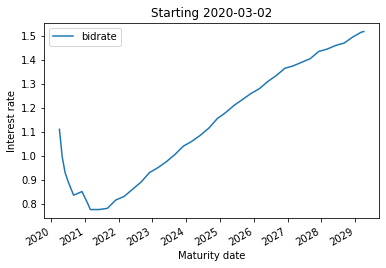

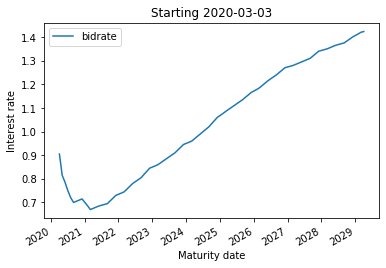

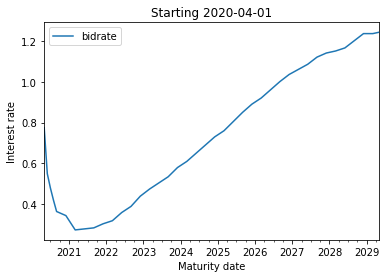

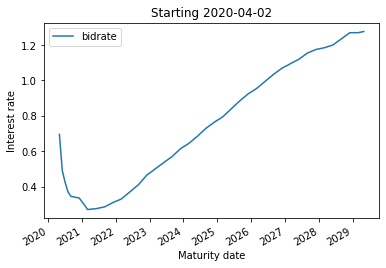

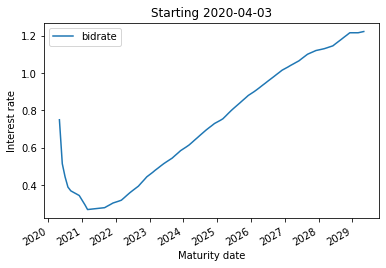

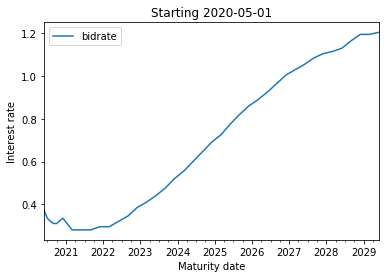

In [11]:
for date in pricedateList:
    if date.day <= 3:
        fig, axis = plt.subplots()
        interest.loc[date, :].plot(ax = axis, y = "bidrate", title = "Starting "+str(date.date()))
        axis.set_xlabel("Maturity date")
        axis.set_ylabel("Interest rate")

In [12]:
natGas_volatility_2020 = pd.read_csv("NG_impliedVols2020.csv")

In [13]:
natGas_volatility_2020.head()

,volatilityindex,volatilitydate,strikeprice,begtime,volatility
0,V_NYMEX Natural Gas,2020-03-09,2.65,2020-11-01,0.336
1,V_NYMEX Natural Gas,2020-03-09,2.70,2020-11-01,0.336
2,V_NYMEX Natural Gas,2020-03-09,2.75,2020-11-01,0.336
3,V_NYMEX Natural Gas,2020-03-09,2.80,2020-11-01,0.336
4,V_NYMEX Natural Gas,2020-03-09,2.85,2020-11-01,0.337


In [14]:
natGas_volatility_2020[["volatilitydate","begtime"]] = natGas_volatility_2020[["volatilitydate","begtime"]].apply(pd.to_datetime, format = "%Y-%m-%d")

In [15]:
natGas_volatility_2020.set_index(["volatilitydate", "begtime"], inplace = True)
natGas_volatility_2020.sort_index(inplace = True)
natGas_volatility_2020.rename_axis(indName, inplace = True)
natGas_volatility_2020.head()

volatilityindex  strikeprice  volatility
asOfDate   maturityDate                                              
2020-03-02 2020-04-01    V_NYMEX Natural Gas         1.03       0.592
           2020-04-01    V_NYMEX Natural Gas         1.08       0.576
           2020-04-01    V_NYMEX Natural Gas         1.13       0.562
           2020-04-01    V_NYMEX Natural Gas         1.18       0.548
           2020-04-01    V_NYMEX Natural Gas         1.23       0.535

In [16]:
natGas2020 = pd.merge(interest, natGas_volatility_2020, left_index = True, right_index = True, how = "inner")

In [17]:
natGas2020

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-04-01 2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.00   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.05   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.10   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.15   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.20   
...                           ...       ...                  ...          ...   
2020-05-01 2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.80   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.85   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.90   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.95   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         5.00   

                         volatility  
asOfDate   maturityDate              
2020-04-01 2020-05-01         0.614  
           2020-05-01         0.650  
           2020-05-01         0.685  
           2020-05-01         0.720  
           2020-05-01         0.755  
...                             ...  
2020-05-01 2020-12-01         0.584  
           2020-12-01         0.587  
           2020-12-01         0.590  
           2020-12-01         0.593  
           2020-12-01         0.596  

[1049 rows x 5 columns]

In [18]:
futprices = pd.read_csv("PricesFile1.csv")
futprices.head()

,priceindex,pricedate,delivdate,price
0,AECO NIT MONTHLY (7A) US$,2020-03-01,2020-03-01,1.3219
1,AECO NIT MONTHLY (7A) US$,2020-04-01,2020-04-01,1.2421
2,AECO NIT MONTHLY (7A) US$,2020-05-01,2020-05-01,1.3385
3,AECO NIT MONTHLY (7A) US$ FWD,2020-03-02,2020-04-01,-0.5140
4,AECO NIT MONTHLY (7A) US$ FWD,2020-03-02,2020-05-01,-0.6160


In [19]:
#Create a new dataframe with the NaturalGass future prices only (indexing creates a view of the original dataframe)
futprices_NatGas = pd.DataFrame(futprices[futprices["priceindex"] == "NYMEX Natural Gas"])

In [20]:
futprices_NatGas[["pricedate", "delivdate"]] = futprices_NatGas[["pricedate", "delivdate"]].apply(pd.to_datetime, format = "%Y-%m-%d")

In [21]:
futprices_NatGas.set_index(["pricedate", "delivdate"], inplace = True)
futprices_NatGas.sort_index(inplace = True)
futprices_NatGas.rename_axis(indName, inplace = True)

In [22]:
futprices_NatGas

priceindex  price
asOfDate   maturityDate                          
2020-03-02 2020-04-01    NYMEX Natural Gas  1.755
           2020-05-01    NYMEX Natural Gas  1.796
           2020-06-01    NYMEX Natural Gas  1.857
           2020-07-01    NYMEX Natural Gas  1.934
           2020-08-01    NYMEX Natural Gas  1.968
...                                    ...    ...
2020-05-29 2022-08-01    NYMEX Natural Gas  2.372
           2022-09-01    NYMEX Natural Gas  2.360
           2022-10-01    NYMEX Natural Gas  2.379
           2022-11-01    NYMEX Natural Gas  2.445
           2022-12-01    NYMEX Natural Gas  2.622

[2018 rows x 2 columns]

In [23]:
natGas2020 = pd.merge(natGas2020, futprices_NatGas, left_index = True, right_index = True, how = "inner")

In [24]:
natGas2020

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-04-01 2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.00   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.05   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.10   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.15   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.20   
...                           ...       ...                  ...          ...   
2020-05-01 2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.80   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.85   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.90   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.95   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         5.00   

                         volatility         priceindex  price  
asOfDate   maturityDate                                        
2020-04-01 2020-05-01         0.614  NYMEX Natural Gas  1.586  
           2020-05-01         0.650  NYMEX Natural Gas  1.586  
           2020-05-01         0.685  NYMEX Natural Gas  1.586  
           2020-05-01         0.720  NYMEX Natural Gas  1.586  
           2020-05-01         0.755  NYMEX Natural Gas  1.586  
...                             ...                ...    ...  
2020-05-01 2020-12-01         0.584  NYMEX Natural Gas  2.964  
           2020-12-01         0.587  NYMEX Natural Gas  2.964  
           2020-12-01         0.590  NYMEX Natural Gas  2.964  
           2020-12-01         0.593  NYMEX Natural Gas  2.964  
           2020-12-01         0.596  NYMEX Natural Gas  2.964  

[1049 rows x 7 columns]

In [25]:
natGas2020["call"] = callEuOpt(natGas2020["bidrate"]/100, natGas2020["maturity"]/12, natGas2020["strikeprice"], natGas2020["price"], natGas2020["volatility"])
natGas2020["put"] = putEuOpt(natGas2020["bidrate"]/100, natGas2020["maturity"]/12, natGas2020["strikeprice"], natGas2020["price"], natGas2020["volatility"])

In [26]:
natGas2020

maturity   bidrate      volatilityindex  strikeprice  \
asOfDate   maturityDate                                                         
2020-04-01 2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.00   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.05   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.10   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.15   
           2020-05-01           1  0.775002  V_NYMEX Natural Gas         1.20   
...                           ...       ...                  ...          ...   
2020-05-01 2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.80   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.85   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.90   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         4.95   
           2020-12-01           7  0.334999  V_NYMEX Natural Gas         5.00   

                         volatility         priceindex  price      call  \
asOfDate   maturityDate                                                   
2020-04-01 2020-05-01         0.614  NYMEX Natural Gas  1.586  0.585945   
           2020-05-01         0.650  NYMEX Natural Gas  1.586  0.536839   
           2020-05-01         0.685  NYMEX Natural Gas  1.586  0.488953   
           2020-05-01         0.720  NYMEX Natural Gas  1.586  0.443076   
           2020-05-01         0.755  NYMEX Natural Gas  1.586  0.399976   
...                             ...                ...    ...       ...   
2020-05-01 2020-12-01         0.584  NYMEX Natural Gas  2.964  0.117742   
           2020-12-01         0.587  NYMEX Natural Gas  2.964  0.114882   
           2020-12-01         0.590  NYMEX Natural Gas  2.964  0.112150   
           2020-12-01         0.593  NYMEX Natural Gas  2.964  0.109538   
           2020-12-01         0.596  NYMEX Natural Gas  2.964  0.107042   

                              put  
asOfDate   maturityDate            
2020-04-01 2020-05-01    0.000323  
           2020-05-01    0.001185  
           2020-05-01    0.003266  
           2020-05-01    0.007357  
           2020-05-01    0.014226  
...                           ...  
2020-05-01 2020-12-01    1.950158  
           2020-12-01    1.997200  
           2020-12-01    2.044370  
           2020-12-01    2.091661  
           2020-12-01    2.139067  

[1049 rows x 9 columns]